## Visualizing tweets and the Logistic Regression model
Objectives: Visualize and interpret the logistic regression model

Steps:

Plot tweets in a scatter plot using their positive and negative sums.
Plot the output of the logistic regression model in the same plot as a solid line

In [2]:
%pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 56.0 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk                         # NLP toolbox
from os import getcwd
import pandas as pd                 # Library for Dataframes 
from nltk.corpus import twitter_samples 
import matplotlib.pyplot as plt     # Library for visualization
import numpy as np                  # Library for math functions

from utils import process_tweet, build_freqs # Our functions for NLP

nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/chinmayhegde/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [4]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

tweets = all_positive_tweets + all_negative_tweets ## Concatenate the lists. 
labels = np.append(np.ones((len(all_positive_tweets),1)), np.zeros((len(all_negative_tweets),1)), axis = 0)

# split the data into two pieces, one for training and one for testing (validation set) 
train_pos  = all_positive_tweets[:4000]
train_neg  = all_negative_tweets[:4000]

train_x = train_pos + train_neg 

print("Number of tweets: ", len(train_x))

Number of tweets:  8000


In [12]:
all_positive_tweets

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
 '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
 '@97sides CONGRATS :)',
 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days',
 '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM',
 "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI",
 '@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.',
 'Jgh , but we have to go to Bayan :D bye',
 'As an act of mischievousness, am calling the ETL layer of our in-house warehousing 

## Load the extracted features
Part of this week's assignment is the creation of the numerical features needed for the Logistic regression model. In order not to interfere with it, we have previously calculated and stored these features in a CSV file for the entire training set.

So, please load these features created for the tweets sample.

In [5]:
data = pd.read_csv('./data/logistic_features.csv'); # Load a 3 columns csv file using pandas function
data.head(10) # Print the first 10 data entries

,bias,positive,negative,sentiment
0,1.0,3020.0,61.0,1.0
1,1.0,3573.0,444.0,1.0
2,1.0,3005.0,115.0,1.0
3,1.0,2862.0,4.0,1.0
4,1.0,3119.0,225.0,1.0
5,1.0,2955.0,119.0,1.0
6,1.0,3934.0,538.0,1.0
7,1.0,3162.0,276.0,1.0
8,1.0,628.0,189.0,1.0
9,1.0,264.0,112.0,1.0


In [6]:
# Each feature is labeled as bias, positive and negative
X = data[['bias', 'positive', 'negative']].values # Get only the numerical values of the dataframe
Y = data['sentiment'].values; # Put in Y the corresponding labels or sentiments

print(X.shape) # Print the shape of the X part
print(X) # Print some rows of X

(8000, 3)
[[1.000e+00 3.020e+03 6.100e+01]
 [1.000e+00 3.573e+03 4.440e+02]
 [1.000e+00 3.005e+03 1.150e+02]
 ...
 [1.000e+00 1.440e+02 7.830e+02]
 [1.000e+00 2.050e+02 3.890e+03]
 [1.000e+00 1.890e+02 3.974e+03]]


In [7]:
theta = [6.03518871e-08, 5.38184972e-04, -5.58300168e-04]

Text(0, 0.5, 'Negative')

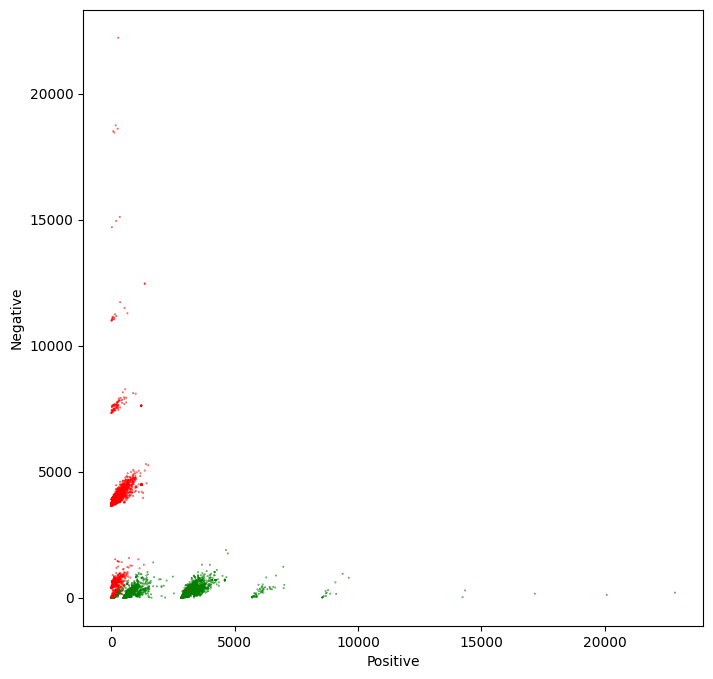

In [8]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color based on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

In [9]:
# Equation for the separation plane
# It give a value in the negative axe as a function of a positive value
# f(pos, neg, W) = w0 + w1 * pos + w2 * neg = 0
# s(pos, W) = (-w0 - w1 * pos) / w2
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

# Equation for the direction of the sentiments change
# We don't care about the magnitude of the change. We are only interested 
# in the direction. So this direction is just a perpendicular function to the 
# separation plane
# df(pos, W) = pos * w2 / w1
def direction(theta, pos):
    return    pos * theta[2] / theta[1]

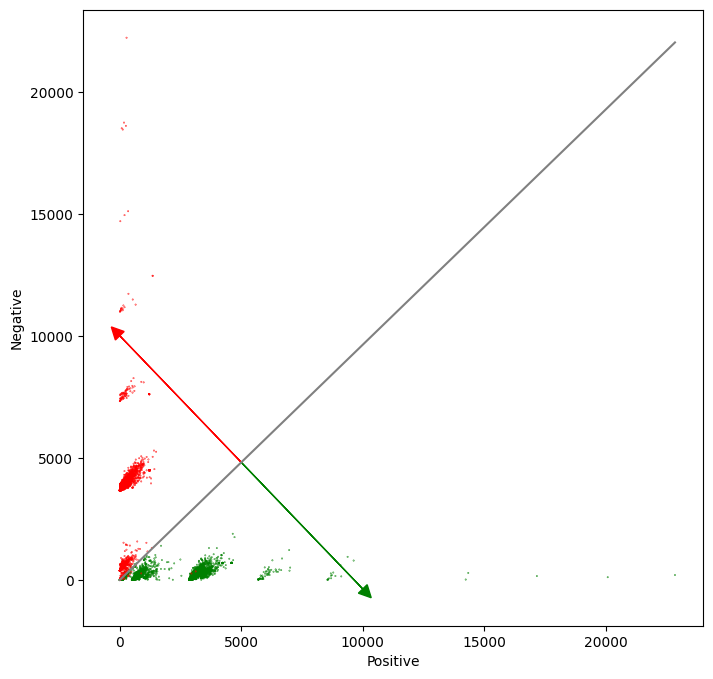

In [10]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color base on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

# Now lets represent the logistic regression model in this chart. 
maxpos = np.max(X[:,1])

offset = 5000 # The pos value for the direction vectors origin

# Plot a gray line that divides the 2 areas.
ax.plot([0,  maxpos], [neg(theta, 0),   neg(theta, maxpos)], color = 'gray') 

# Plot a green line pointing to the positive direction
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')
# Plot a red line pointing to the negative direction
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')

plt.show()